#Bootcamp Ciencia de Datos e Inteligencia Artificial
## Proyecto Módulo 2 Limpieza y preprocesado de datos

## Introducción

En la vida laboral de un científico de datos, la tarea más importante es realizar un buen análisis. Sin un entendimiento del problema, resultará difícil aplicar un buen modelo para su resolución. Por ello, ahora que comprendiste las técnicas revisadas a lo largo de este módulo, serás capaz de aplicar el tratamiento necesario de un conjunto de datos para su explotación.

## Demo

Este documento te servirá como inspiración para crear el tuyo: https://drive.google.com/file/d/1LKiMVyepbdTBK_Fs_9e6-y2ybB0Kem-Y/view?usp=sharing

## ¿Qué construirás?

Un análisis sobre un conjunto de datos para su posterior modelado. Este proyecto se dividirá en 4 secciones:

*   Análisis Exploratorio
*   Limpieza de datos
*   Procesamiento de datos
*   Reducción de dimensiones

## Criterios de evaluación

* Análisis Exploratorio: Calidad del análisis, entendimiento de las variables y estudio de las correlaciones con el objetivo. (25pts)
  - Excelente: Comprende la multicolinealidad entre las variables y señala gráficamente los valores atípicos en las distribuciones.
  - Suficiente: Comprende la relevancia de las variables e identifica las variables más significativas y cuales tienen mayor relación con el objetivo.

*   Limpieza de datos: Eliminación de faltantes, duplicados y atípicos de manera correcta, eligiendo el mejor modo para imputar valores faltantes. (25pts)

  - Excelente: Elimina los valores atí­picos y los imputa seleccionando a través de pruebas de hipótesis para justificarlo.
  - Suficiente: Elimina las variables que no cumplen con el criterio de completitud y se imputan los valores restantes.


*   Procesamiento de datos: Correcto uso de transformadores, justificando el porque se eligió uno sobre algún otro. (25pts)

  - Excelente: Transforma las variables de acuerdo a su naturaleza utilizando distintos métodos para escalar dependiendo de los valores de cada variable.
  - Transforma las variables categóricas y variables continuas.

*   Reducción de dimensiones: Selección de la mejor técnica para reducir las dimensiones, además de justificar el porque se esta reduciendo a cierto número sobre cualquier otro. (25pts)

  - Excelente: Elige el óptimo número de dimensiones de acuerdo a varias técnicas, justificando el porque se eligió el número de dimensiones final.
  - Suficiente: Reduce el conjunto de datos propuesto para una correcta reducción de nuestro set de datos.


## Objetivos

El participante:

* Realizará un correcto análisis y tratamiento de datos, el cuál le permita preparar y limpiar los datos de la forma más adecuada para utilizarlos posteriormente en un modelo.
* Comprenderá la relevacia de las variables e identificará las variables más significativas que tienen mayor relación con el objetivo.
* Comprenderá la multicolinealidad entre las variables y señalará gráficamente los valores atípicos en las distribuciones.
* Eliminará valores faltantes, duplicados y atípicos de manera correcta, usando el modo más adecuado para su objetivo.
* Usará de forma adecuada los transformadores utilizando distintos métodos para escalar en función de los valores de cada variable.
* Hará una correcta reducción del set de datos y elegirá el número óptimo de dimensiones mediante diversas técnicas.

¡Es momento de ponerte a prueba y descubrir todo lo que eres capaz!

Comienza por analizar cada uno de los apartados que te solicitamos para este proyecto y trata de usar todas las herramientas que aprendiste a lo largo del módulo. Recuerda que el detalle que pongas en cada proceso será tomado en cuenta en tu evaluación, revisa los criterios en la sección de tareas de Teams.

¡Te desemos éxito!

## Conjunto de datos para analizar.
Se tiene información de Lending Club, empresa estadounidense de préstamos con sede en San Francisco, California. En dicha compañía, los prestatarios pueden acceder fácilmente a préstamos con tasas de interés bajas.
El dataset contiene datos de todos los préstamos emitidos durante el periodo 2007-2015, con el estado actual del préstamo (actual, cancelado, completamente pagado) y la información de pago más reciente.

Las características adicionales incluyen puntajes de crédito, número de consultas financieras y cobros, entre otros.

Puedes descargar la información al hacer clic en el siguiente enlace:https://drive.google.com/file/d/1oxjXn7PkuqeSdQz5dOMXZOJfhJoBlX3T/view?usp=sharing

¡Comencemos!

In [ ]:
#Importa las librerías que vayas a usar para tu proyecto, no olvides importar pandas.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import warnings
from functools import reduce


pd.set_option("display.max_columns", 200)
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#El primer paso es descargar el archivo, guardarlo en drive y finalmente leerlo con pd.read_csv.
df = pd.read_csv('/content/drive/MyDrive/Modulo 2/dataset_Proyecto_M2.csv')

## Parte 1
Dado el _dataset_:

* Identifica el tipo de datos de cada variable y verifica la completitud.
* Determina las variables que son continuas, discretas y la variable objetivo.

> Puedes contar los valores dentro de una variable y utilizar las funciones que desees para cumplir estos objetivos; mientras más completo sea el EDA, mejor puntaje obtendrás.



In [ ]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(887379, 74)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [ ]:
#Eliminamos columnas que no nos sirven para el proyecto

df.drop(columns=['id', 'member_id', 'emp_title', 'title', 'url', 'desc'], inplace=True)

In [ ]:
def renombrar_columnas(df, columnas, prefix):
  nuevos = [prefix + columna for columna in columnas]
  df = df.rename(columns=dict(zip(columnas, nuevos)))
  return df

In [ ]:
v_feats = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
           'purpose', 'zip_code', 'addr_state', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_bmths', 'mths_since', 'last_delinq',
           'mths_since_last_record', 'open_acc', 'pub_rec', 'total_acc', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d',
           'last_credit_pull_d', 'collection_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type',
           'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rent_il', 'open_rv_12m',
           'open_rv_24m', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'mths_since_last_delinq', 'mths_since_rcnt_il']

c_feats = ['funded_amnt', 'funded_amnt_inv', 'installment', 'anual_inc', 'dti', 'revol_bal', 'revol_util', 'int_rate', 'out_prncp',
           'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
           'collection_recovery_fee', 'last_pymnt_amnt', 'dti_joint', 'annual_inc_joint', 'acc_now_delinq', 'il_util', 'max_bal_bc',
           'all_util', 'total_rev_hi_lim', 'annual_inc', 'inq_last_6mths', 'collections_12_mths_ex_med', 'tot_coll_amt', 'tot_cur_bal', 'total_bal_il']

tgt = ['loan_amnt']

df = renombrar_columnas(df, v_feats, "v_")
df = renombrar_columnas(df, c_feats, "c_")
df = renombrar_columnas(df, tgt, "tgt_")

df.head()

,tgt_loan_amnt,c_funded_amnt,c_funded_amnt_inv,v_term,c_int_rate,c_installment,v_grade,v_sub_grade,v_emp_length,v_home_ownership,c_annual_inc,v_verification_status,v_issue_d,v_loan_status,v_pymnt_plan,v_purpose,v_zip_code,v_addr_state,c_dti,v_delinq_2yrs,v_earliest_cr_line,c_inq_last_6mths,v_mths_since_last_delinq,v_mths_since_last_record,v_open_acc,v_pub_rec,c_revol_bal,c_revol_util,v_total_acc,v_initial_list_status,c_out_prncp,c_out_prncp_inv,c_total_pymnt,c_total_pymnt_inv,c_total_rec_prncp,c_total_rec_int,c_total_rec_late_fee,c_recoveries,c_collection_recovery_fee,v_last_pymnt_d,c_last_pymnt_amnt,v_next_pymnt_d,v_last_credit_pull_d,c_collections_12_mths_ex_med,v_mths_since_last_major_derog,v_policy_code,v_application_type,c_annual_inc_joint,c_dti_joint,v_verification_status_joint,c_acc_now_delinq,c_tot_coll_amt,c_tot_cur_bal,v_open_acc_6m,v_open_il_6m,v_open_il_12m,v_open_il_24m,v_mths_since_rcnt_il,c_total_bal_il,c_il_util,v_open_rv_12m,v_open_rv_24m,c_max_bal_bc,c_all_util,c_total_rev_hi_lim,v_inq_fi,v_total_cu_tl,v_inq_last_12m
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,other,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.filter(like = "tgt_").describe()

,tgt_loan_amnt
count,887379.000000
mean,14755.264605
std,8435.455601
min,500.000000
25%,8000.000000
50%,13000.000000
75%,20000.000000
max,35000.000000


<Axes: xlabel='tgt_loan_amnt', ylabel='Density'>

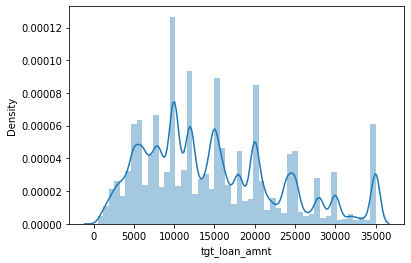

In [ ]:
sns.distplot(df["tgt_loan_amnt"])

<Axes: xlabel='c_funded_amnt_inv', ylabel='tgt_loan_amnt'>

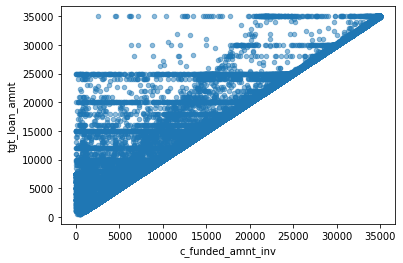

In [ ]:
datos = pd.concat([df["tgt_loan_amnt"], df["c_funded_amnt_inv"]], axis=1)
datos.plot.scatter(x="c_funded_amnt_inv", y="tgt_loan_amnt", alpha = 0.5)

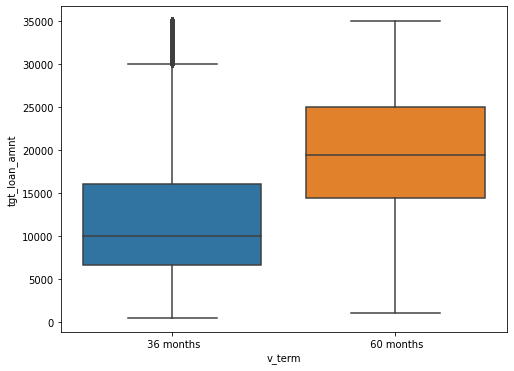

In [ ]:
datos2 = pd.concat([df["tgt_loan_amnt"], df['v_term']], axis=1)
fig, ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x='v_term', y='tgt_loan_amnt', data=datos2)

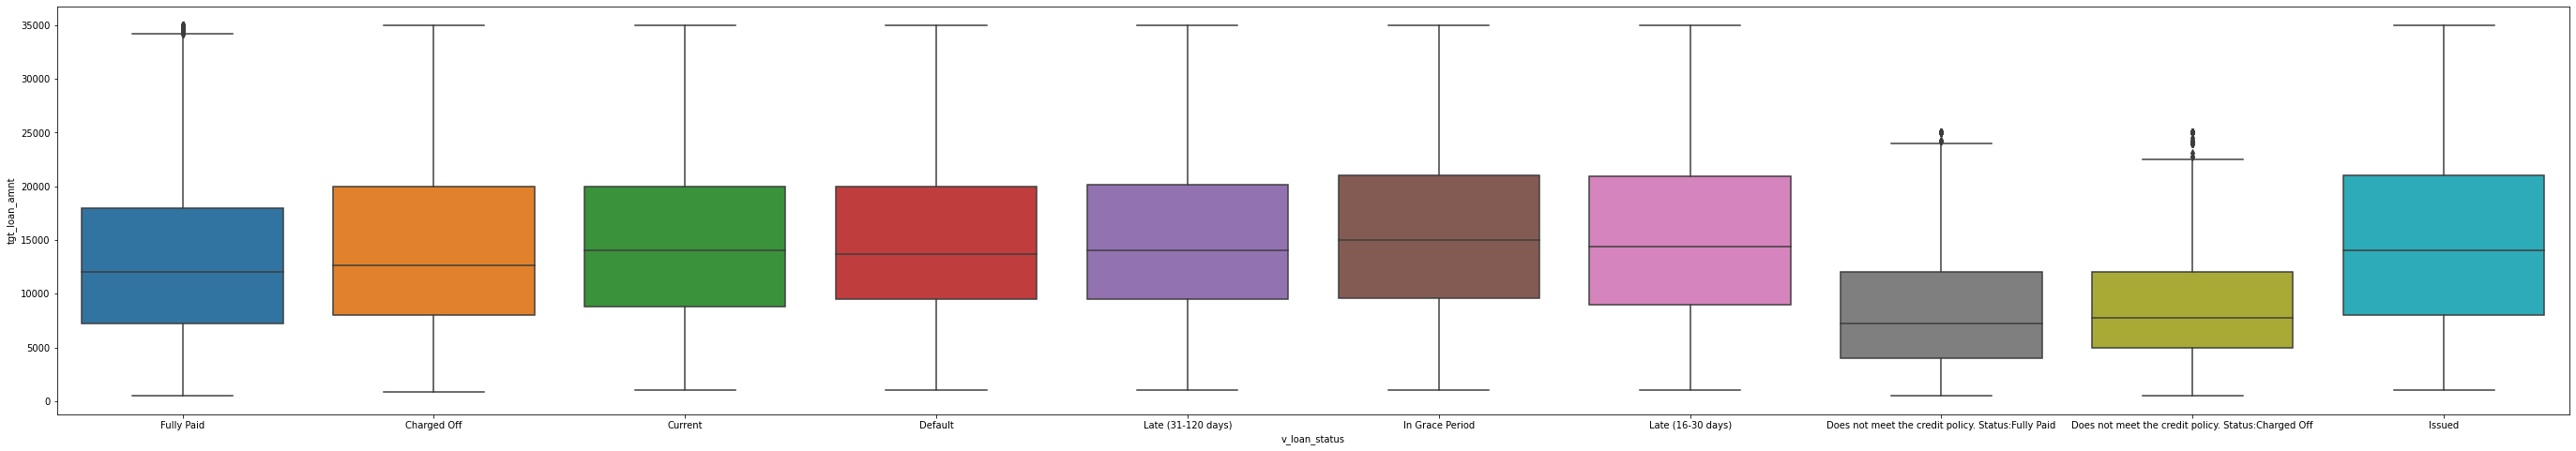

In [ ]:
datos4 = pd.concat([df["tgt_loan_amnt"], df['v_loan_status']], axis=1)
fig, ax = plt.subplots(figsize = (48,8))
fig = sns.boxplot(x='v_loan_status', y='tgt_loan_amnt', data=datos4)

In [ ]:
# Analisis Multivariante/ Matriz de correlación general entre todas las variables
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,tgt_loan_amnt,c_funded_amnt,c_funded_amnt_inv,c_int_rate,c_installment,c_annual_inc,c_dti,v_delinq_2yrs,c_inq_last_6mths,v_mths_since_last_delinq,v_mths_since_last_record,v_open_acc,v_pub_rec,c_revol_bal,c_revol_util,v_total_acc,c_out_prncp,c_out_prncp_inv,c_total_pymnt,c_total_pymnt_inv,c_total_rec_prncp,c_total_rec_int,c_total_rec_late_fee,c_recoveries,c_collection_recovery_fee,c_last_pymnt_amnt,c_collections_12_mths_ex_med,v_mths_since_last_major_derog,v_policy_code,c_annual_inc_joint,c_dti_joint,c_acc_now_delinq,c_tot_coll_amt,c_tot_cur_bal,v_open_acc_6m,v_open_il_6m,v_open_il_12m,v_open_il_24m,v_mths_since_rcnt_il,c_total_bal_il,c_il_util,v_open_rv_12m,v_open_rv_24m,c_max_bal_bc,c_all_util,c_total_rev_hi_lim,v_inq_fi,v_total_cu_tl,v_inq_last_12m
tgt_loan_amnt,1.000000,0.999263,0.997115,0.145023,0.944977,0.332698,0.020675,-0.000159,-0.034168,-0.038080,-0.010734,0.198906,-0.081177,0.333580,0.119565,0.222639,0.646897,0.646898,0.474626,0.475655,0.390473,0.533916,0.031395,0.073150,0.052205,0.229244,-0.016650,-0.037278,nan,0.438866,0.018769,0.003947,-0.004275,0.328782,-0.040487,0.027938,-0.013290,0.024537,-0.010985,0.135564,-0.107249,-0.051313,-0.028005,0.412165,0.019173,0.312439,0.009638,0.071500,0.007928
c_funded_amnt,0.999263,1.000000,0.998025,0.145160,0.946005,0.332466,0.021075,0.000151,-0.034711,-0.038117,-0.010811,0.199387,-0.080836,0.333435,0.120061,0.222575,0.648838,0.648839,0.473286,0.474502,0.389242,0.532864,0.031075,0.072687,0.051955,0.228772,-0.016491,-0.037271,nan,0.438866,0.018769,0.004051,-0.004275,0.328781,-0.040487,0.027938,-0.013290,0.024537,-0.010985,0.135564,-0.107249,-0.051313,-0.028005,0.412165,0.019173,0.312439,0.009638,0.071500,0.007928
c_funded_amnt_inv,0.997115,0.998025,1.000000,0.145205,0.943632,0.331420,0.022185,0.000648,-0.038880,-0.035778,0.009348,0.200004,-0.079790,0.331736,0.120759,0.222793,0.651545,0.651556,0.468848,0.474062,0.384877,0.530382,0.027961,0.070751,0.049392,0.227510,-0.016063,-0.037235,nan,0.439213,0.018461,0.004245,-0.004274,0.328804,-0.040600,0.027902,-0.013438,0.024388,-0.010901,0.135529,-0.107337,-0.051439,-0.028118,0.412268,0.018969,0.312473,0.009548,0.071515,0.007820
c_int_rate,0.145023,0.145160,0.145205,1.000000,0.133075,-0.072786,0.079903,0.055178,0.227650,-0.030033,0.022485,-0.010381,0.052156,-0.035708,0.269139,-0.038618,0.042671,0.042529,0.170506,0.171479,0.054975,0.445679,0.057150,0.106840,0.070867,0.101179,0.013336,-0.011180,nan,-0.099026,0.287345,0.026478,0.001130,-0.091408,0.226033,0.044591,0.245076,0.199579,-0.128746,0.053045,0.183565,0.176683,0.171105,-0.104402,0.288049,-0.166119,0.171162,0.020711,0.252637
c_installment,0.944977,0.946005,0.943632,0.133075,1.000000,0.326182,0.014333,0.007876,-0.003623,-0.041391,-0.018560,0.183868,-0.069967,0.316588,0.131798,0.200409,0.548159,0.548154,0.514954,0.515817,0.449439,0.498665,0.041810,0.074546,0.054313,0.238447,-0.014108,-0.039111,nan,0.405141,-0.001334,0.006580,-0.003526,0.297898,-0.018804,0.016050,0.000167,0.021219,-0.011339,0.116193,-0.102522,-0.022923,-0.004324,0.385694,0.025131,0.286829,0.015213,0.056176,0.029699
c_annual_inc,0.332698,0.332466,0.331420,-0.072786,0.326182,1.000000,-0.087410,0.047470,0.035193,-0.050350,-0.096151,0.138392,-0.008341,0.295784,0.036730,0.187335,0.211213,0.211254,0.160879,0.160821,0.149993,0.128535,0.013500,0.007717,0.006630,0.090964,-0.003936,-0.037394,nan,0.711091,-0.085873,0.014775,0.001096,0.418332,0.044003,0.063222,0.088163,0.119505,-0.075736,0.215808,-0.050157,-0.006532,-0.011844,0.323838,0.009813,0.268860,0.063758,0.052432,0.079720
c_dti,0.020675,0.021075,0.022185,0.079903,0.014333,-0.087410,1.000000,-0.002831,-0.008106,0.001447,0.065933,0.144250,-0.022926,0.067277,0.087844,0.108056,0.059319,0.059282,-0.041529,-0.040336,-0.052056,0.008380,-0.005748,0.001162,0.002159,-0.029351,-0.000292,0.007736,nan,0.001654,0.006211,0.003205,-0.002084,-0.007282,0.005227,0.028668,0.020348,0.031041,-0.036447,0.028134,-0.004285,-0.003016,-0.001053,0.010856,0.034614,0.032941,0.011065,0.011851,0.003552
v_del

> Recomendaciones: usa funciones como `.info`, `.head` y `.duplicated`.



## Parte 2
* Elimina los datos faltantes o duplicados con el método que sea más conveniente y justifica tu elección.

* Elimina las variables cuyo valor de completitud sea menor a 80; después, identifica y modifica aquellos valores atípicos (_outliers_).

In [ ]:
#Duplicados

duplicados = df[df.duplicated()]
duplicados.shape


(0, 68)

In [ ]:
#Análisis de completitud
completitud = pd.DataFrame(df.isnull().sum())
completitud.reset_index(inplace = True)
completitud = completitud.rename(columns={'index':'columna', 0:"total"})
completitud["completitud"] = (1 - completitud['total'] / df.shape[0]) * 100
completitud = completitud.sort_values(by="completitud", ascending = True)
completitud.reset_index(drop = True, inplace = True)
completitud.head(21)

,columna,total,completitud
0,c_dti_joint,886870,0.057360
1,v_verification_status_joint,886868,0.057585
2,c_annual_inc_joint,886868,0.057585
3,c_il_util,868762,2.097976
4,v_mths_since_rcnt_il,866569,2.345108
5,v_total_cu_tl,866007,2.408441
6,v_open_acc_6m,866007,2.408441
7,v_open_il_6m,866007,2.408441
8,v_open_il_12m,866007,2.408441
9,v_inq_last_12m,866007,2.408441


In [ ]:
#lista con las variables del dataset cuya completitud es menor al 80%
para_eliminar = list(completitud[completitud['completitud'] < 80]['columna'].values)
para_eliminar

['c_dti_joint',
 'v_verification_status_joint',
 'c_annual_inc_joint',
 'c_il_util',
 'v_mths_since_rcnt_il',
 'v_total_cu_tl',
 'v_open_acc_6m',
 'v_open_il_6m',
 'v_open_il_12m',
 'v_inq_last_12m',
 'v_open_rv_12m',
 'v_open_rv_24m',
 'c_max_bal_bc',
 'c_all_util',
 'v_inq_fi',
 'c_total_bal_il',
 'v_open_il_24m',
 'v_mths_since_last_record',
 'v_mths_since_last_major_derog',
 'v_mths_since_last_delinq',
 'v_next_pymnt_d']

In [ ]:
df = df.drop(columns = para_eliminar)
df.shape

(887379, 47)

In [ ]:
df.head()

,tgt_loan_amnt,c_funded_amnt,c_funded_amnt_inv,v_term,c_int_rate,c_installment,v_grade,v_sub_grade,v_emp_length,v_home_ownership,c_annual_inc,v_verification_status,v_issue_d,v_loan_status,v_pymnt_plan,v_purpose,v_zip_code,v_addr_state,c_dti,v_delinq_2yrs,v_earliest_cr_line,c_inq_last_6mths,v_open_acc,v_pub_rec,c_revol_bal,c_revol_util,v_total_acc,v_initial_list_status,c_out_prncp,c_out_prncp_inv,c_total_pymnt,c_total_pymnt_inv,c_total_rec_prncp,c_total_rec_int,c_total_rec_late_fee,c_recoveries,c_collection_recovery_fee,v_last_pymnt_d,c_last_pymnt_amnt,v_last_credit_pull_d,c_collections_12_mths_ex_med,v_policy_code,v_application_type,c_acc_now_delinq,c_tot_coll_amt,c_tot_cur_bal,c_total_rev_hi_lim
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,other,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN


In [ ]:
completitud = pd.DataFrame(df.isnull().sum())
completitud.reset_index(inplace = True)
completitud = completitud.rename(columns={'index':'columna', 0:"total"})
completitud["completitud"] = (1 - completitud['total'] / df.shape[0]) * 100
completitud = completitud.sort_values(by="completitud", ascending = True)
completitud.reset_index(drop = True, inplace = True)
completitud

,columna,total,completitud
0,c_total_rev_hi_lim,70276,92.080498
1,c_tot_coll_amt,70276,92.080498
2,c_tot_cur_bal,70276,92.080498
3,v_emp_length,44825,94.948607
4,v_last_pymnt_d,17659,98.009982
5,c_revol_util,502,99.943429
6,c_collections_12_mths_ex_med,145,99.983660
7,v_last_credit_pull_d,53,99.994027
8,c_acc_now_delinq,29,99.996732
9,v_total_acc,29,99.996732


In [ ]:
# Lista con variables con completitus es menor a 80%

imputacion = list(completitud[completitud['completitud'] != 100]['columna'].values)
imputacion

['c_total_rev_hi_lim',
 'c_tot_coll_amt',
 'c_tot_cur_bal',
 'v_emp_length',
 'v_last_pymnt_d',
 'c_revol_util',
 'c_collections_12_mths_ex_med',
 'v_last_credit_pull_d',
 'c_acc_now_delinq',
 'v_total_acc',
 'v_open_acc',
 'c_inq_last_6mths',
 'v_earliest_cr_line',
 'v_delinq_2yrs',
 'v_pub_rec',
 'c_annual_inc']

In [ ]:
para_imputar = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
para_imputar.fit(df[imputacion])

SimpleImputer(strategy='most_frequent')

In [ ]:
df[imputacion] = para_imputar.transform(df[imputacion])

In [ ]:
df.tail(12)

,tgt_loan_amnt,c_funded_amnt,c_funded_amnt_inv,v_term,c_int_rate,c_installment,v_grade,v_sub_grade,v_emp_length,v_home_ownership,c_annual_inc,v_verification_status,v_issue_d,v_loan_status,v_pymnt_plan,v_purpose,v_zip_code,v_addr_state,c_dti,v_delinq_2yrs,v_earliest_cr_line,c_inq_last_6mths,v_open_acc,v_pub_rec,c_revol_bal,c_revol_util,v_total_acc,v_initial_list_status,c_out_prncp,c_out_prncp_inv,c_total_pymnt,c_total_pymnt_inv,c_total_rec_prncp,c_total_rec_int,c_total_rec_late_fee,c_recoveries,c_collection_recovery_fee,v_last_pymnt_d,c_last_pymnt_amnt,v_last_credit_pull_d,c_collections_12_mths_ex_med,v_policy_code,v_application_type,c_acc_now_delinq,c_tot_coll_amt,c_tot_cur_bal,c_total_rev_hi_lim
887367,10000.0,10000.0,10000.0,36 months,6.49,306.45,A,A2,1 year,RENT,75000.0,Verified,Jan-2015,Current,n,debt_consolidation,333xx,FL,33.66,0.0,Mar-2000,0.0,9.0,0.0,10529.0,34.7,32.0,w,6879.87,6879.87,3670.19,3670.19,3120.13,550.06,0.0,0.0,0.0,Jan-2016,306.45,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,88120.0,30300.0
887368,13150.0,13150.0,13150.0,60 months,14.99,312.77,C,C5,8 years,MORTGAGE,30000.0,Verified,Jan-2015,Current,n,major_purchase,286xx,NC,1.00,0.0,May-1994,0.0,3.0,0.0,672.0,3.2,14.0,w,11240.27,11240.27,3731.34,3731.34,1909.73,1821.61,0.0,0.0,0.0,Jan-2016,312.77,Mar-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,158977.0,20700.0
887369,4000.0,4000.0,4000.0,36 months,8.67,126.59,B,B1,10+ years,MORTGAGE,50000.0,Verified,Jan-2015,Fully Paid,n,car,956xx,CA,12.63,0.0,Sep-2002,0.0,11.0,1.0,1700.0,5.6,30.0,f,0.00,0.00,4158.02,4158.02,4000.00,158.02,0.0,0.0,0.0,Jun-2015,3655.51,Nov-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,18979.0,30100.0
887370,7500.0,7500.0,7500.0,36 months,9.49,240.22,B,B2,8 years,RENT,40000.0,Verified,Jan-2015,Current,n,debt_consolidation,531xx,WI,25.63,0.0,Aug-1994,0.0,10.0,1.0,6361.0,43.9,29.0,f,5232.15,5232.15,2874.73,2874.73,2267.85,606.88,0.0,0.0,0.0,Jan-2016,240.22,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,3174.0,18611.0,14500.0
887371,10850.0,10850.0,10850.0,36 months,19.24,399.04,E,E2,10+ years,OWN,32000.0,Verified,Jan-2015,Charged Off,n,debt_consolidation,430xx,OH,29.44,0.0,Jun-2002,1.0,9.0,0.0,6987.0,41.6,20.0,f,0.00,0.00,2396.05,2396.05,1405.77,990.28,0.0,0.0,0.0,Aug-2015,25.00,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,972.0,53777.0,16800.0
887372,12000.0,12000.0,12000.0,36 months,11.99,398.52,B,B5,< 1 year,MORTGAGE,63000.0,Verified,Jan-2015,Current,n,credit_card,432xx,OH,23.69,1.0,Jun-1995,0.0,13.0,0.0,21110.0,69.7,61.0,f,8466.56,8466.56,4766.25,4766.25,3533.44,1232.81,0.0,0.0,0.0,Jan-2016,398.52,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,237002.0,30300.0
887373,11575.0,11575.0,11575.0,36 months,15.59,404.61,D,D1,10+ years,RENT,25400.0,Verified,Jan-2015,Current,n,credit_card,791xx,TX,27.08,0.0,Jul-1999,0.0,9.0,0.0,18266.0,65.0,18.0,f,8296.52,8296.52,4863.33,4863.33,3278.48,1584.85,0.0,0.0,0.0,Jan-2016,404.61,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,19798.0,28100.0
887374,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,8 years,RENT,31000.0,Verified,Jan-2015,Current,n,debt_consolidation,905xx,CA,28.69,0.0,Sep-2004,0.0,9.0,1.0,14037.0,82.1,15.0,f,7055.47,7055.47,3971.88,3971.88,2944.53,1027.35,0.0,0.0,0.0,Jan-2016,332.10,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,25274.0,17100.0
887375,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,10+ years,MORTGAGE,79000.0,Verified,Jan-2015,Current,n,home_improvement,072xx,NJ,3.90,0.0,Mar-1974,1.0,5.0,0.0,8621.0,84.5,23.0,f,16933.26,16933.26,9532.39,9532.39,7066.74,2465.65,0.0,0.0,0.0,Jan-2016,797.03,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,140285.0,10200.0
887376,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,5 years,RENT,35000.0,Verified,Jan-2015,Current,n,debt_consolidation,378xx,TN,30.90,0.0,Sep-2003,0.0,9.0,1.0,11031.0,61.3,22.0,w,11155.50,11155.50,3769.74,3769.74,1844.50,1925.24,0.0,0.0,0.0,Jan-2016,316.07,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,34178.0,18000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 47 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   tgt_loan_amnt                 887379 non-null  float64
 1   c_funded_amnt                 887379 non-null  float64
 2   c_funded_amnt_inv             887379 non-null  float64
 3   v_term                        887379 non-null  object 
 4   c_int_rate                    887379 non-null  float64
 5   c_installment                 887379 non-null  float64
 6   v_grade                       887379 non-null  object 
 7   v_sub_grade                   887379 non-null  object 
 8   v_emp_length                  887379 non-null  object 
 9   v_home_ownership              887379 non-null  object 
 10  c_annual_inc                  887379 non-null  object 
 11  v_verification_status         887379 non-null  object 
 12  v_issue_d                     887379 non-nul

In [ ]:
#Convertimos las variables que son tipo object a float
df['c_annual_inc'] = df['c_annual_inc'].astype('float64')
df['v_pub_rec'] = df['v_pub_rec'].astype('float64')
df['c_inq_last_6mths'] = df['c_inq_last_6mths'].astype('float64')
df['v_delinq_2yrs'] = df['v_delinq_2yrs'].astype('float64')
df['c_collections_12_mths_ex_med'] = df['c_collections_12_mths_ex_med'].astype('float64')
df['v_open_acc'] = df['v_open_acc'].astype('float64')
df['c_tot_coll_amt'] = df['c_tot_coll_amt'].astype('float64')
df['c_revol_util'] = df['c_revol_util'].astype('float64')
df['v_total_acc'] = df['v_total_acc'].astype('float64')
df['c_acc_now_delinq'] = df['c_acc_now_delinq'].astype('float64')
df['c_tot_cur_bal'] = df['c_tot_cur_bal'].astype('float64')
df['c_total_rev_hi_lim'] = df['c_total_rev_hi_lim'].astype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 47 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   tgt_loan_amnt                 887379 non-null  float64
 1   c_funded_amnt                 887379 non-null  float64
 2   c_funded_amnt_inv             887379 non-null  float64
 3   v_term                        887379 non-null  object 
 4   c_int_rate                    887379 non-null  float64
 5   c_installment                 887379 non-null  float64
 6   v_grade                       887379 non-null  object 
 7   v_sub_grade                   887379 non-null  object 
 8   v_emp_length                  887379 non-null  object 
 9   v_home_ownership              887379 non-null  object 
 10  c_annual_inc                  887379 non-null  float64
 11  v_verification_status         887379 non-null  object 
 12  v_issue_d                     887379 non-nul

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,tgt_loan_amnt,c_funded_amnt,c_funded_amnt_inv,c_int_rate,c_installment,c_annual_inc,c_dti,v_delinq_2yrs,c_inq_last_6mths,v_open_acc,v_pub_rec,c_revol_bal,c_revol_util,v_total_acc,c_out_prncp,c_out_prncp_inv,c_total_pymnt,c_total_pymnt_inv,c_total_rec_prncp,c_total_rec_int,c_total_rec_late_fee,c_recoveries,c_collection_recovery_fee,c_last_pymnt_amnt,c_collections_12_mths_ex_med,v_policy_code,c_acc_now_delinq,c_tot_coll_amt,c_tot_cur_bal,c_total_rev_hi_lim
tgt_loan_amnt,1.000000,0.999263,0.997115,0.145023,0.944977,0.332698,0.020675,-0.000143,-0.034138,0.198919,-0.081161,0.333580,0.119804,0.222644,0.646897,0.646898,0.474626,0.475655,0.390473,0.533916,0.031395,0.073150,0.052205,0.229244,-0.016630,nan,0.003949,-0.003503,0.330375,0.310256
c_funded_amnt,0.999263,1.000000,0.998025,0.145160,0.946005,0.332467,0.021075,0.000167,-0.034681,0.199401,-0.080819,0.333435,0.120298,0.222580,0.648838,0.648839,0.473286,0.474502,0.389242,0.532864,0.031075,0.072687,0.051955,0.228772,-0.016471,nan,0.004054,-0.003472,0.331929,0.311146
c_funded_amnt_inv,0.997115,0.998025,1.000000,0.145205,0.943632,0.331420,0.022185,0.000667,-0.038841,0.200021,-0.079769,0.331736,0.121041,0.222797,0.651545,0.651556,0.468848,0.474062,0.384877,0.530382,0.027961,0.070751,0.049392,0.227510,-0.016032,nan,0.004249,-0.003382,0.334656,0.312310
c_int_rate,0.145023,0.145160,0.145205,1.000000,0.133075,-0.072784,0.079903,0.055187,0.227665,-0.010367,0.052165,-0.035708,0.268095,-0.038610,0.042671,0.042529,0.170506,0.171479,0.054975,0.445679,0.057150,0.106840,0.070867,0.101179,0.013344,nan,0.026480,0.001366,-0.074391,-0.153333
c_installment,0.944977,0.946005,0.943632,0.133075,1.000000,0.326182,0.014333,0.007891,-0.003593,0.183882,-0.069951,0.316588,0.131938,0.200415,0.548159,0.548154,0.514954,0.515817,0.449439,0.498665,0.041810,0.074546,0.054313,0.238447,-0.014089,nan,0.006582,-0.002802,0.300593,0.285219
c_annual_inc,0.332698,0.332467,0.331420,-0.072784,0.326182,1.000000,-0.087408,0.047470,0.035194,0.138391,-0.008340,0.295784,0.036369,0.187333,0.211214,0.211254,0.160879,0.160822,0.149993,0.128536,0.013501,0.007717,0.006630,0.090964,-0.003935,nan,0.014775,0.001233,0.399584,0.261903
c_dti,0.020675,0.021075,0.022185,0.079903,0.014333,-0.087408,1.000000,-0.002823,-0.008092,0.144258,-0.022919,0.067277,0.088021,0.108060,0.059319,0.059282,-0.041529,-0.040336,-0.052056,0.008380,-0.005748,0.001162,0.002159,-0.029351,-0.000283,nan,0.003207,-0.001665,0.009091,0.040650
v_delinq_2yrs,-0.000143,0.000167,0.000667,0.055187,0.007891,0.047470,-0.002823,1.000000,0.021384,0.051194,-0.011000,-0.032477,-0.017635,0.122716,0.031630,0.031619,-0.031897,-0.031460,-0.038389,0.001672,0.017405,-0.000734,0.000977,-0.019513,0.063006,nan,0.130327,0.000544,0.075394,-0.033051
c_inq_last_6mths,-0.034138,-0.034681,-0.038841,0.227665,-0.003593,0.035194,-0.008092,0.021384,1.000000,0.111245,0.056877,-0.017538,-0.087377,0.135589,-0.106711,-0.106731,0.077692,0.073863,0.062392,0.085597,0.031587,0.045577,0.033969,0.060007,0.006824,nan,-0.005327,0.002420,0.010536,-0.004937
v_open_acc,0.198919,0.199401,0.200021,-0.010367,0.183882,0.138391,0.144258,0.051194,0.111245,1.000000,-0.025296,0.224551,-0.141971,0.695076,0.171811,0.171814,0.042599,0.043843,0.031154,0.061232,-0.009624,0.001554,0.003199,0.028056,0.009617,nan,0.017753,0.000730,0.253068,0.324820


In [ ]:
def atipicos(df, columnas) :
  resultados = pd.DataFrame()
  total = []
  total_per = []
  total_z = []
  indices = []


  for col in columnas :
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3 - q1
    inf = q1 - 1.5 * (iqr)
    sup = q3 + 1.5 * (iqr)

    num_outliers = df[ (df[col] < inf)  | (df[col] > sup) ].shape[0]
    total.append(num_outliers)
    indices_iqr = list(df[ (df[col] < inf)  | (df[col] > sup) ].index)

    INF_pe = np.percentile(df[col].dropna(), 5)
    SUP_pe = np.percentile(df[col].dropna(), 95)
    num_outliers_per = df[ (df[col] < INF_pe)  | (df[col] > SUP_pe) ].shape[0]
    total_per.append(num_outliers_per)
    indices_per = list(df[ (df[col] < INF_pe)  | (df[col] > SUP_pe)].index)

    percentil_100 = [x / 100 for x in range(100)]
    distribucion = df[col].describe(percentil_100).iloc[4:]


    cambios_percentil = df[col].describe(percentil_100).iloc[4:].diff()
    cambio_promedio = df[col].describe(percentil_100).iloc[4:].diff().mean()

    if cambios_percentil["max"] > cambio_promedio :
      banda_superior = distribucion["max"] - cambio_promedio
      if banda_superior < distribucion["99%"] :
        banda_superior = distribucion["99%"]
    else :
      banda_superior = distribucion["max"]

    if cambios_percentil["1%"] > cambio_promedio :
      banda_inferior = distribucion["0%"] + cambio_promedio
      if banda_inferior > distribucion["1%"] :
        banda_inferior = distribucion["1%"]
    else:
      banda_inferior = distribucion["0%"]

    num_total_z = df[ (df[col] < banda_inferior)  | (df[col] > banda_superior)].shape[0]
    total_z.append(num_total_z)
    indices_z = list(df[ (df[col] < banda_inferior)  | (df[col] > banda_superior)].index)

    indices.append(auxiliar_atipicos(indices_iqr, indices_per, indices_z))


  resultados["columna"] = columnas
  resultados["outliers IQR"] = total
  resultados["outliers Percentil"] = total_per
  resultados["outliers cambio promedio"] = total_z
  resultados["outliers IQR %"] = round( (resultados["outliers IQR"] / df.shape[0])*100 , 2)
  resultados["outliers Percentil %"] = round( (resultados["outliers Percentil"] / df.shape[0])*100 , 2)
  resultados["outliers cambio promedio %"] = round( (resultados["outliers cambio promedio"] / df.shape[0])*100 , 2)
  resultados["indices"] = indices
  resultados["outliers total"] = resultados["indices"].map(lambda x:len(x))
  resultados["% outliers total"] = round((resultados["outliers total"] / df.shape[0]) * 100, 2)
  return resultados


def auxiliar_atipicos(lista_iqr, lista_per, lista_z) :

  lista_iqr = set(lista_iqr)
  lista_per = set(lista_per)
  lista_z = set(lista_z)

  lista_iqr2 = lista_iqr.intersection(lista_per)
  lista_per2 = lista_per.intersection(lista_z)
  lista_z2 = lista_iqr.intersection(lista_z)
  indices_atipicos = list( set( list(lista_iqr2) + list(lista_per2) + list(lista_z2)) )
  return indices_atipicos

In [ ]:
outliers = atipicos(df, list(df.filter(like="c_")))
outliers

,columna,outliers IQR,outliers Percentil,outliers cambio promedio,outliers IQR %,outliers Percentil %,outliers cambio promedio %,indices,outliers total,% outliers total
0,c_funded_amnt,0,86107,26,0.00,9.70,0.00,"[39442, 38932, 38936, 42136, 39331, 39466, 422...",26,0.00
1,c_funded_amnt_inv,0,84100,478,0.00,9.48,0.05,"[41422, 41423, 41424, 41425, 41426, 41427, 414...",478,0.05
2,c_int_rate,6308,83192,112,0.71,9.38,0.01,"[327680, 753667, 327684, 819204, 557063, 32769...",6308,0.71
3,c_installment,23149,88608,80,2.61,9.99,0.01,"[524291, 393233, 655380, 131102, 655398, 52432...",23227,2.62
4,c_annual_inc,39719,84768,1,4.48,9.55,0.00,"[524292, 655374, 524306, 655380, 262167, 39324...",39719,4.48
5,c_dti,81,88687,2,0.01,9.99,0.00,"[524288, 542724, 541704, 519691, 555531, 48590...",81,0.01
6,c_inq_last_6mths,53834,16436,1,6.07,1.85,0.00,"[1, 65537, 393217, 688134, 294920, 753674, 425...",16436,1.85
7,c_revol_bal,48649,88734,1,5.48,10.00,0.00,"[524289, 524292, 786437, 393237, 262167, 65538...",44367,5.00
8,c_revol_util,51,88302,1,0.01,9.95,0.00,"[811008, 487938, 404996, 808709, 283910, 49127...",51,0.01
9,c_out_prncp,3363,44354,1,0.38,5.00,0.00,"[499714, 466949, 540678, 483338, 507917, 46695...",3363,0.38


In [ ]:
indices = list(outliers["indices"].values)
indices = list(set(reduce(lambda x, y: x + y, indices)))
len(indices)

277053

In [ ]:
len(indices) / df.shape[0]

0.31221496113836367

In [ ]:
df = df[~df.index.isin(indices)].reset_index(drop=True)   # Datos que NO vamos a eliminar

In [ ]:
df.shape

(610326, 47)

## Parte 3
Usa un transformador o los transformadores necesarios y justifica tu elección.

In [ ]:
# Justificación

''' El escalador MinMaxScaler transforma las variables escalándolas a un rango (0,1), donde le valor más pequeño puede ser 0 y el más grande 1,
    y al reescalar los datos para que se ajusten a un mínimo y un máximo, se evitará el sesgo del resultado del modelo, ya no existiendo
    tanta diferencia entre cada variable '''

' El escalador MinMaxScaler transforma las variables escalándolas a un rango (0,1), donde le valor más pequeño puede ser 0 y el más grande 1, \n    y al reescalar los datos para que se ajusten a un mínimo y un máximo, se evitará el sesgo del resultado del modelo, ya no existiendo\n    tanta diferencia entre cada variable '

In [ ]:
escalador = MinMaxScaler()
transformados = escalador.fit_transform(df.filter(like = "c_"))
transformados

array([[0.1202346 , 0.13347763, 0.26703407, ..., 0.        , 0.        ,
        0.1867995 ],
       [0.04398827, 0.05916306, 0.53306613, ..., 0.        , 0.        ,
        0.1867995 ],
       [0.06158358, 0.07647908, 0.36923848, ..., 0.        , 0.        ,
        0.1867995 ],
       ...,
       [0.67741935, 0.68253968, 0.33416834, ..., 0.        , 0.30850718,
        0.12702366],
       [0.35483871, 0.36507937, 0.53456914, ..., 0.        , 0.07516241,
        0.2241594 ],
       [0.5601173 , 0.56709957, 0.33416834, ..., 0.        , 0.07324695,
        0.51930262]])

In [ ]:
transformados = pd.DataFrame(transformados)
transformados.columns = df.filter(like = "c_").columns
transformados.describe()

,c_funded_amnt,c_funded_amnt_inv,c_int_rate,c_installment,c_annual_inc,c_dti,c_inq_last_6mths,c_revol_bal,c_revol_util,c_out_prncp,c_out_prncp_inv,c_total_pymnt,c_total_pymnt_inv,c_total_rec_prncp,c_total_rec_int,c_total_rec_late_fee,c_recoveries,c_collection_recovery_fee,c_last_pymnt_amnt,c_collections_12_mths_ex_med,c_acc_now_delinq,c_tot_coll_amt,c_tot_cur_bal,c_total_rev_hi_lim
count,610326.000000,610326.000000,610326.000000,610326.000000,610326.000000,610326.000000,610326.000000,610326.000000,610326.000000,610326.000000,610326.000000,610326.000000,610326.000000,610326.000000,610326.000000,610326.0,610326.0,610326.0,610326.000000,610326.0,610326.0,610326.000000,610326.000000,610326.000000
mean,0.340608,0.350357,0.374611,0.338792,0.390200,0.436197,0.196028,0.288049,0.431183,0.233282,0.233292,0.232211,0.231823,0.214534,0.217812,0.0,0.0,0.0,0.097600,0.0,0.0,0.033280,0.216434,0.300035
std,0.200205,0.197260,0.201580,0.187003,0.177252,0.199627,0.273025,0.202647,0.184625,0.219253,0.219260,0.207946,0.207633,0.214186,0.201401,0.0,0.0,0.0,0.186618,0.0,0.0,0.130591,0.227940,0.192734
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
25%,0.188416,0.197691,0.222445,0.205608,0.257731,0.286123,0.000000,0.136069,0.297722,0.019027,0.019024,0.068120,0.067999,0.052793,0.065678,0.0,0.0,0.0,0.020042,0.0,0.0,0.000000,0.044951,0.166874
50%,0.310850,0.320346,0.369238,0.305270,0.360556,0.424416,0.000000,0.239971,0.436764,0.191732,0.191804,0.169170,0.168872,0.136097,0.156156,0.0,0.0,0.0,0.030399,0.0,0.0,0.000000,0.111628,0.244085
75%,0.442815,0.451659,0.514529,0.450372,0.492019,0.576299,0.333333,0.391963,0.572663,0.369086,0.369147,0.342727,0.342019,0.308007,0.309764,0.0,0.0,0.0,0.050454,0.0,0.0,0.000000,0.351388,0.399751
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,0.0,0.0,1.000000,1.000000,1.000000


In [ ]:
df.filter(like = "v_").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610326 entries, 0 to 610325
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   v_term                 610326 non-null  int64  
 1   v_grade                610326 non-null  int64  
 2   v_sub_grade            610326 non-null  int64  
 3   v_emp_length           610326 non-null  int64  
 4   v_home_ownership       610326 non-null  int64  
 5   v_verification_status  610326 non-null  int64  
 6   v_issue_d              610326 non-null  object 
 7   v_loan_status          610326 non-null  int64  
 8   v_pymnt_plan           610326 non-null  object 
 9   v_purpose              610326 non-null  int64  
 10  v_zip_code             610326 non-null  object 
 11  v_addr_state           610326 non-null  object 
 12  v_delinq_2yrs          610326 non-null  float64
 13  v_earliest_cr_line     610326 non-null  object 
 14  v_open_acc             610326 non-nu

In [ ]:
# Justificación

''' Se utiliza LabelEncoder para transformar la categoría encontada, asignandole un número, ya que existen algunos algoritmos que
    no comprenden texto'''

' Se utiliza LabelEncoder para transformar la categoría encontada, asignandole un número, ya que existen algunos algoritmos que \n    no comprenden texto'

In [ ]:
encoder = LabelEncoder()
df['v_term'] = encoder.fit_transform(df['v_term'])
df['v_grade'] = encoder.fit_transform(df['v_grade'])
df['v_sub_grade'] = encoder.fit_transform(df['v_sub_grade'])
df['v_emp_length'] = encoder.fit_transform(df['v_emp_length'])
df['v_home_ownership'] = encoder.fit_transform(df['v_home_ownership'])
df['v_verification_status'] = encoder.fit_transform(df['v_verification_status'])
df['v_issue_d'] = encoder.fit_transform(df['v_issue_d'])
df['v_loan_status'] = encoder.fit_transform(df['v_loan_status'])
df['v_pymnt_plan'] = encoder.fit_transform(df['v_pymnt_plan'])
df['v_purpose'] = encoder.fit_transform(df['v_purpose'])
df['v_zip_code'] = encoder.fit_transform(df['v_zip_code'])
df['v_addr_state'] = encoder.fit_transform(df['v_addr_state'])
df['v_delinq_2yrs'] = encoder.fit_transform(df['v_delinq_2yrs'])
df['v_earliest_cr_line'] = encoder.fit_transform(df['v_earliest_cr_line'])
df['v_open_acc'] = encoder.fit_transform(df['v_open_acc'])
df['v_pub_rec'] = encoder.fit_transform(df['v_pub_rec'])
df['v_total_acc'] = encoder.fit_transform(df['v_total_acc'])
df['v_initial_list_status'] = encoder.fit_transform(df['v_initial_list_status'])
df['v_last_pymnt_d'] = encoder.fit_transform(df['v_last_pymnt_d'])
df['v_last_credit_pull_d'] = encoder.fit_transform(df['v_last_credit_pull_d'])
df['policy_code'] = encoder.fit_transform(df['v_policy_code'])
df['v_application_type'] = encoder.fit_transform(df['v_application_type'])



df_label = df[['v_term', 'v_grade', 'v_sub_grade', 'v_home_ownership', 'v_home_ownership', 'v_verification_status', 'v_issue_d', 'v_loan_status', 'v_pymnt_plan',
               'v_purpose', 'v_zip_code', 'v_addr_state', 'v_delinq_2yrs', 'v_earliest_cr_line', 'v_open_acc', 'v_pub_rec', 'v_total_acc', 'v_initial_list_status',
               'v_last_pymnt_d', 'v_last_credit_pull_d', 'policy_code', 'v_application_type' ]]

In [ ]:
df = pd.concat([transformados, df_label], axis=1)
df

,c_funded_amnt,c_funded_amnt_inv,c_int_rate,c_installment,c_annual_inc,c_dti,c_inq_last_6mths,c_revol_bal,c_revol_util,c_out_prncp,c_out_prncp_inv,c_total_pymnt,c_total_pymnt_inv,c_total_rec_prncp,c_total_rec_int,c_total_rec_late_fee,c_recoveries,c_collection_recovery_fee,c_last_pymnt_amnt,c_collections_12_mths_ex_med,c_acc_now_delinq,c_tot_coll_amt,c_tot_cur_bal,c_total_rev_hi_lim,v_term,v_grade,v_sub_grade,v_home_ownership,v_home_ownership,v_verification_status,v_issue_d,v_loan_status,v_pymnt_plan,v_purpose,v_zip_code,v_addr_state,v_delinq_2yrs,v_earliest_cr_line,v_open_acc,v_pub_rec,v_total_acc,v_initial_list_status,v_last_pymnt_d,v_last_credit_pull_d,policy_code,v_application_type
0,0.120235,0.133478,0.267034,0.131394,0.142053,0.659275,0.333333,0.310910,0.657502,0.000000,0.000000,0.244174,0.243600,0.250000,0.146155,0.0,0.0,0.0,0.013270,0.0,0.0,0.0,0.000000,0.186800,0,1,6,5,5,2,21,5,0,1,797,3,0,254,3,0,8,0,39,41,0,0
1,0.043988,0.059163,0.533066,0.053656,0.066554,0.207916,0.666667,0.067339,0.773763,0.000000,0.000000,0.125133,0.125466,0.120000,0.102462,0.0,0.0,0.0,0.050253,0.0,0.0,0.0,0.000000,0.186800,0,2,14,5,5,0,21,5,0,11,563,14,0,554,2,0,9,0,55,41,0,0
2,0.061584,0.076479,0.369238,0.037285,0.501941,0.427754,0.000000,0.632913,0.423409,0.022460,0.022470,0.135070,0.135429,0.111655,0.171276,0.0,0.0,0.0,0.005242,0.0,0.0,0.0,0.000000,0.186800,1,1,9,5,5,1,21,1,0,9,891,37,0,265,15,0,37,0,40,41,0,0
3,0.120235,0.134199,0.129259,0.125049,0.219172,0.267048,1.000000,0.181402,0.222310,0.000000,0.000000,0.234605,0.235229,0.250000,0.107168,0.0,0.0,0.0,0.012451,0.0,0.0,0.0,0.000000,0.186800,0,0,3,5,5,1,21,5,0,13,790,3,0,557,9,0,11,0,39,100,0,0
4,0.178886,0.191919,0.533066,0.138530,0.289890,0.560563,0.333333,0.403809,0.672427,0.055327,0.055352,0.338984,0.339885,0.255543,0.513621,0.0,0.0,0.0,0.013151,0.0,0.0,0.0,0.000000,0.186800,1,2,14,5,5,0,21,1,0,2,265,27,0,330,7,0,10,0,40,41,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610321,0.313050,0.323954,0.514529,0.370665,0.151050,0.645684,0.000000,0.416110,0.510605,0.242978,0.243087,0.202608,0.203147,0.163924,0.269007,0.0,0.0,0.0,0.031286,0.0,0.0,0.0,0.043539,0.349938,0,3,15,5,5,2,41,1,0,1,735,43,0,324,9,0,17,0,40,41,0,0
610322,0.266862,0.278499,0.334168,0.298895,0.187039,0.684072,0.000000,0.319771,0.644933,0.206632,0.206725,0.165470,0.165910,0.147227,0.174379,0.0,0.0,0.0,0.025679,0.0,0.0,0.0,0.055581,0.212951,0,1,9,5,5,2,41,1,0,2,829,4,0,671,9,1,14,0,40,41,0,0
610323,0.677419,0.682540,0.334168,0.759076,0.495514,0.092990,0.333333,0.196392,0.663786,0.495920,0.496143,0.397123,0.398179,0.353337,0.418511,0.0,0.0,0.0,0.061629,0.0,0.0,0.0,0.308507,0.127024,0,1,9,1,1,2,41,1,0,4,63,31,0,412,5,0,22,0,40,41,0,0
610324,0.354839,0.365079,0.534569,0.283029,0.212745,0.736767,0.000000,0.251293,0.481540,0.326708,0.326855,0.157049,0.157466,0.092225,0.326784,0.0,0.0,0.0,0.024440,0.0,0.0,0.0,0.075162,0.224159,1,3,16,5,5,2,41,1,0,2,361,42,0,670,9,1,21,1,40,41,0,0


In [ ]:
df.describe()

,c_funded_amnt,c_funded_amnt_inv,c_int_rate,c_installment,c_annual_inc,c_dti,c_inq_last_6mths,c_revol_bal,c_revol_util,c_out_prncp,c_out_prncp_inv,c_total_pymnt,c_total_pymnt_inv,c_total_rec_prncp,c_total_rec_int,c_total_rec_late_fee,c_recoveries,c_collection_recovery_fee,c_last_pymnt_amnt,c_collections_12_mths_ex_med,c_acc_now_delinq,c_tot_coll_amt,c_tot_cur_bal,c_total_rev_hi_lim,v_term,v_grade,v_sub_grade,v_home_ownership,v_home_ownership,v_verification_status,v_issue_d,v_loan_status,v_pymnt_plan,v_purpose,v_zip_code,v_addr_state,v_delinq_2yrs,v_earliest_cr_line,v_open_acc,v_pub_rec,v_total_acc,v_initial_list_status,v_last_pymnt_d,v_last_credit_pull_d,policy_code,v_application_type
count,610326.000000,610326.000000,610326.000000,610326.000000,610326.000000,610326.000000,610326.000000,610326.000000,610326.000000,610326.000000,610326.000000,610326.000000,610326.000000,610326.000000,610326.000000,610326.0,610326.0,610326.0,610326.000000,610326.0,610326.0,610326.000000,610326.000000,610326.000000,610326.000000,610326.000000,610326.000000,610326.000000,610326.000000,610326.000000,610326.000000,610326.000000,610326.000000,610326.000000,610326.000000,610326.000000,610326.000000,610326.000000,610326.000000,610326.000000,610326.000000,610326.000000,610326.000000,610326.000000,610326.0,610326.000000
mean,0.340608,0.350357,0.374611,0.338792,0.390200,0.436197,0.196028,0.288049,0.431183,0.233282,0.233292,0.232211,0.231823,0.214534,0.217812,0.0,0.0,0.0,0.097600,0.0,0.0,0.033280,0.216434,0.300035,0.255077,1.676112,10.337826,3.090447,3.090447,0.927611,55.138955,2.045907,0.000003,2.554541,473.869965,23.164579,0.297153,361.692617,10.980820,0.204337,22.773162,0.500193,40.456304,42.779446,0.0,0.000467
std,0.200205,0.197260,0.201580,0.187003,0.177252,0.199627,0.273025,0.202647,0.184625,0.219253,0.219260,0.207946,0.207633,0.214186,0.201401,0.0,0.0,0.0,0.186618,0.0,0.0,0.130591,0.227940,0.192734,0.435905,1.211395,5.969600,1.921526,1.921526,0.787373,30.054827,1.949478,0.001810,2.283989,286.240650,15.100957,0.843994,203.323099,4.994923,0.558134,11.277242,0.500000,17.226185,12.121878,0.0,0.021604
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.188416,0.197691,0.222445,0.205608,0.257731,0.286123,0.000000,0.136069,0.297722,0.019027,0.019024,0.068120,0.067999,0.052793,0.065678,0.0,0.0,0.0,0.020042,0.0,0.0,0.000000,0.044951,0.166874,0.000000,1.000000,6.000000,1.000000,1.000000,0.000000,25.000000,1.000000,0.000000,1.000000,217.000000,9.000000,0.000000,159.000000,7.000000,0.000000,14.000000,0.000000,38.000000,41.000000,0.0,0.000000
50%,0.310850,0.320346,0.369238,0.305270,0.360556,0.424416,0.000000,0.239971,0.436764,0.191732,0.191804,0.169170,0.168872,0.136097,0.156156,0.0,0.0,0.0,0.030399,0.0,0.0,0.000000,0.111628,0.244085,0.000000,2.000000,10.000000,4.000000,4.000000,1.000000,57.000000,1.000000,0.000000,2.000000,453.000000,23.000000,0.000000,378.000000,10.000000,0.000000,21.000000,1.000000,40.000000,41.000000,0.0,0.000000
75%,0.442815,0.451659,0.514529,0.450372,0.492019,0.576299,0.333333,0.391963,0.572663,0.369086,0.369147,0.342727,0.342019,0.308007,0.309764,0.0,0.0,0.0,0.050454,0.0,0.0,0.000000,0.351388,0.399751,1.000000,2.000000,14.000000,5.000000,5.000000,2.000000,83.000000,1.000000,0.000000,2.000000,746.000000,35.000000,0.000000,551.000000,14.000000,0.000000,29.000000,1.000000,40.000000,41.000000,0.0,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,6.000000,34.000000,5.000000,5.000000,2.000000,102.000000,9.000000,1.000000,13.000000,917.000000,50.0000

## Parte 4

Selecciona la mejor técnica para reducir las dimenciones y justifica por qué debe reducirse. Se recomienda indicar el número de dimensiones óptimo.

> Recuerda incluir en tu análisis los gráficos adecuados para comunicar lo que deseas expresar. Para favorecer tu entendimiento del programa, se sugiere el uso de comentarios (#) en cada bloque de código.



In [ ]:
pip install varclushi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 KB 2.7 MB/s eta 0:00:00


In [ ]:
df.columns

Index(['c_funded_amnt', 'c_funded_amnt_inv', 'c_int_rate', 'c_installment',
       'c_annual_inc', 'c_dti', 'c_inq_last_6mths', 'c_revol_bal',
       'c_revol_util', 'c_out_prncp', 'c_out_prncp_inv', 'c_total_pymnt',
       'c_total_pymnt_inv', 'c_total_rec_prncp', 'c_total_rec_int',
       'c_total_rec_late_fee', 'c_recoveries', 'c_collection_recovery_fee',
       'c_last_pymnt_amnt', 'c_collections_12_mths_ex_med', 'c_acc_now_delinq',
       'c_tot_coll_amt', 'c_tot_cur_bal', 'c_total_rev_hi_lim', 'v_term',
       'v_grade', 'v_sub_grade', 'v_home_ownership', 'v_home_ownership',
       'v_verification_status', 'v_issue_d', 'v_loan_status', 'v_pymnt_plan',
       'v_purpose', 'v_zip_code', 'v_addr_state', 'v_delinq_2yrs',
       'v_earliest_cr_line', 'v_open_acc', 'v_pub_rec', 'v_total_acc',
       'v_initial_list_status', 'v_last_pymnt_d', 'v_last_credit_pull_d',
       'policy_code', 'v_application_type'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610326 entries, 0 to 610325
Data columns (total 46 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   c_funded_amnt                 610326 non-null  float64
 1   c_funded_amnt_inv             610326 non-null  float64
 2   c_int_rate                    610326 non-null  float64
 3   c_installment                 610326 non-null  float64
 4   c_annual_inc                  610326 non-null  float64
 5   c_dti                         610326 non-null  float64
 6   c_inq_last_6mths              610326 non-null  float64
 7   c_revol_bal                   610326 non-null  float64
 8   c_revol_util                  610326 non-null  float64
 9   c_out_prncp                   610326 non-null  float64
 10  c_out_prncp_inv               610326 non-null  float64
 11  c_total_pymnt                 610326 non-null  float64
 12  c_total_pymnt_inv             610326 non-nul

In [ ]:
from varclushi import VarClusHi

In [ ]:
# Se crea varible vc, que es igual a la funcion VaeClushi(), colocando adentro del paréntesis variables con valores numéricos

vc = VarClusHi(df[['c_funded_amnt', 'c_funded_amnt_inv', 'c_int_rate', 'c_installment',
       'c_annual_inc', 'c_dti', 'v_term','v_grade', 'v_sub_grade' ]],maxeigval2=.7)
vc.varclus()

In [ ]:
#Se conoce la relacion de R2 de cada variable
vc.rsquare

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,c_funded_amnt,0.986682,0.205072,0.016754
1,0,c_funded_amnt_inv,0.985560,0.205523,0.018176
2,0,c_installment,0.944837,0.148811,0.064807
3,1,c_int_rate,0.973338,0.134718,0.030813
4,1,v_grade,0.970619,0.159408,0.034953
5,1,v_sub_grade,0.988699,0.166044,0.013551
6,2,c_dti,1.000000,0.044971,0.000000
7,3,v_term,1.000000,0.156629,0.000000
8,4,c_annual_inc,1.000000,0.166371,0.000000


In [ ]:
''' Se observa que las variables c_funded_amnt, v_sub_grade, c_dti, v_term, c_annual_inc,
    se agruparon para un mismo cluster, optando con la variable perteneciente
    al clúster con mayor varianza'''

vc.rsquare.sort_values(["Cluster","RS_Ratio"],ascending=True).drop_duplicates(subset=["Cluster"],keep="first")

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,c_funded_amnt,0.986682,0.205072,0.016754
5,1,v_sub_grade,0.988699,0.166044,0.013551
6,2,c_dti,1.000000,0.044971,0.000000
7,3,v_term,1.000000,0.156629,0.000000
8,4,c_annual_inc,1.000000,0.166371,0.000000
